<a href="https://colab.research.google.com/github/SarikaGPawar/PRODIGY_ML_02/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

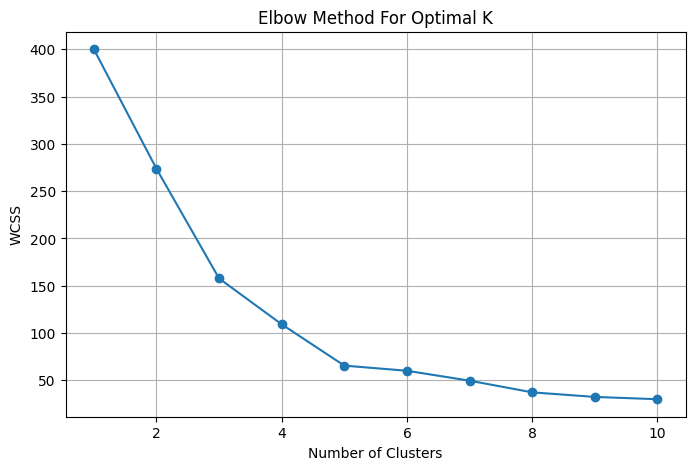

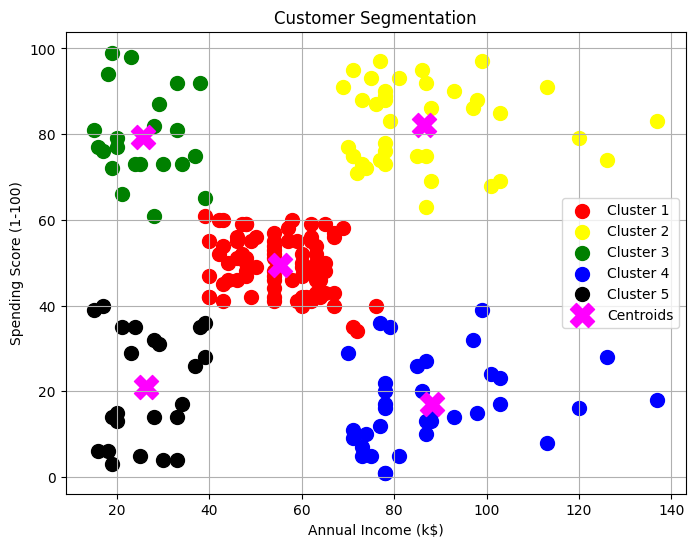

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv")

# Explore data
print(data.head())
print(data.info())
print(data.describe())

# Select features
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with K=5 (from elbow)
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_means = k_means.fit_predict(x_scaled)

# Add cluster labels to original DataFrame
data['Cluster'] = y_means

# Visualize Clusters (using original x values)
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[y_means == 0, 0], x.iloc[y_means == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x.iloc[y_means == 1, 0], x.iloc[y_means == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x.iloc[y_means == 2, 0], x.iloc[y_means == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s=100, c='black', label='Cluster 5')

# Plot centroids (on original scale, so inverse transform)
centroids = scaler.inverse_transform(k_means.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='magenta', marker='X', label='Centroids')

plt.title("Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()
